# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "f956df277a83558a768d1d55d1173e35496654b6"
connection.set_access_token(API_TOKEN)

# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O bollinger_bands.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/bollinger_bands.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' bollinger_bands.py

In [5]:
from bollinger_bands import BollingerBands as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130146,
 'strategyId': '051152d23624454383ea5359654e01eb'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('NVDA', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:NVDA'

## Setup Parameters

In [9]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKFWEIK28TM4F3NNEYHR', 
        'CLIENT_API_SECRET': '2RaicNUeV8BWIT8qd3S8wOAqMFLwoRESuM37d5tD'
    }
}

In [10]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [11]:
parameters = {
  'TIME_PERIOD': 12,
  'STANDARD_DEVIATIONS': 2,
}

In [12]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

### Start

In [13]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    vendor_details=vendor_details,
    initial_funds_virtual=initial_virtual_funds
    
)


Starting the strategy 'Bollinger Bands US' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════╕
│ Config                  │ Value                                         │
╞═════════════════════════╪═══════════════════════════════════════════════╡
│ Vendor Name             │ ALPACAV2                                      │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Strategy Name           │ Bollinger Bands US                            │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                   │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:NVDA']                               │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Quantity/Lots           │ 5                                             │
├────────────────────

### Status

In [14]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [15]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (8)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [16]:
print(logs)

[2023-08-22 10:25:46+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 10:25:46+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 10:25:47+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 15:55:42] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 15:55:42] Sanity checks on cfg successful.
[2023-08-22 15:55:42] Currency set to "USD"
[2023-08-22 15:55:42] Setting up broker connection...
[2023-08-22 15:55:44] Broker connection has been setup successfully.
[2023-08-22 15:55:44] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-08-22 15:55:44] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 15:55:44] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-22 15:55:44] Reading strategy...
[2023-08-22 15:55:44] Entering Backtesting mode. Henceforth, all timestamps will b

### Stop

In [17]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [18]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute
0,NASDAQ,NVDA,2021-08-02 10:30:00-04:00,SELL,5,$,195.99,2021-08-02 15:30:00-04:00,BUY,5,$,197.99,-10.00,-10.00
1,NASDAQ,NVDA,2021-08-03 11:30:00-04:00,SELL,5,$,194.52,2021-08-03 12:30:00-04:00,BUY,5,$,197.22,-13.50,-23.50
2,NASDAQ,NVDA,2021-08-03 12:30:00-04:00,BUY,5,$,197.22,2021-08-03 15:30:00-04:00,SELL,5,$,197.22,0.00,-23.50
3,NASDAQ,NVDA,2021-08-04 12:30:00-04:00,SELL,5,$,200.73,2021-08-04 15:30:00-04:00,BUY,5,$,200.73,0.00,-23.50
4,NASDAQ,NVDA,2021-08-06 12:30:00-04:00,BUY,5,$,204.37,2021-08-06 15:30:00-04:00,SELL,5,$,204.37,0.00,-23.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,NASDAQ,NVDA,2023-07-21 11:30:00-04:00,BUY,5,$,449.28,2023-07-21 15:30:00-04:00,SELL,5,$,446.97,-11.55,67.55
157,NASDAQ,NVDA,2023-07-24 11:30:00-04:00,BUY,5,$,449.33,2023-07-24 15:30:00-04:00,SELL,5,$,449.20,-0.65,66.90
158,NASDAQ,NVDA,2023-07-25 11:30:00-04:00,SELL,5,$,457.83,2023-07-25 15:30:00-04:00,BUY,5,$,459.36,-7.65,59.25
159,NASDAQ,NVDA,2023-07-26 12:30:00-04:00,BUY,5,$,450.59,2023-07-26 15:30:00-04:00,SELL,5,$,450.59,0.00,59.25


## Statistics Reports

### Statistics

In [19]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      69.0%

Cumulative Return   1.74%
CAGR﹪              0.87%

Sharpe              0.5
Prob. Sharpe Ratio  65.81%
Sortino             0.8
Sortino/√2          0.57
Omega               1.13

Max Drawdown        -4.51%
Longest DD Days     547

Gain/Pain Ratio     0.13
Gain/Pain (1M)      0.2

Payoff Ratio        1.07
Profit Factor       1.13
Common Sense Ratio  1.13
CPC Index           0.62
Tail Ratio          1.0
Outlier Win Ratio   7.88
Outlier Loss Ratio  3.53

MTD                 -0.27%
3M                  2.17%
6M                  2.25%
YTD                 3.13%
1Y                  2.66%
3Y (ann.)           0.87%
5Y (ann.)           0.87%
10Y (ann.)          0.87%
All-time (ann.)     0.87%

Avg. Drawdown       -1.15%
Avg. Drawdown Days  128
Recovery Factor     0.38
Ulcer Index         0.02
Serenity Index      0.06


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             69.0%

Cumulative Return          1.74%
CAGR﹪                     0.87%

Sharpe                     0.5
Prob. Sharpe Ratio         65.81%
Smart Sharpe               0.42
Sortino                    0.8
Smart Sortino              0.67
Sortino/√2                 0.57
Smart Sortino/√2           0.47
Omega                      1.13

Max Drawdown               -4.51%
Longest DD Days            547
Volatility (ann.)          5.68%
Calmar                     0.19
Skew                       1.16
Kurtosis                   9.47

Expected Daily %           0.01%
Expected Monthly %         0.07%
Expected Yearly %          0.58%
Kelly Criterion            5.86%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.58%
Expected Shortfall (cVaR)  -0.58%

Max Consecutive Wins       4
Max 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-12-27,2022-08-10,2023-06-28,547,-4.512555,-4.491630
2,2023-07-14,2023-07-25,2023-07-31,17,-0.575592,-0.388219
3,2021-08-03,2021-08-03,2021-08-19,15,-0.338346,-0.275689
4,2021-09-02,2021-10-20,2021-10-26,54,-0.268990,-0.244199
5,2023-07-05,2023-07-05,2023-07-12,7,-0.042995,0.000000


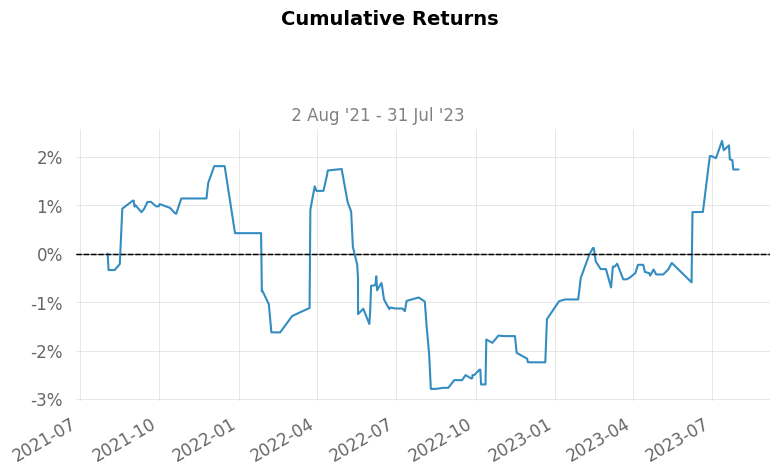

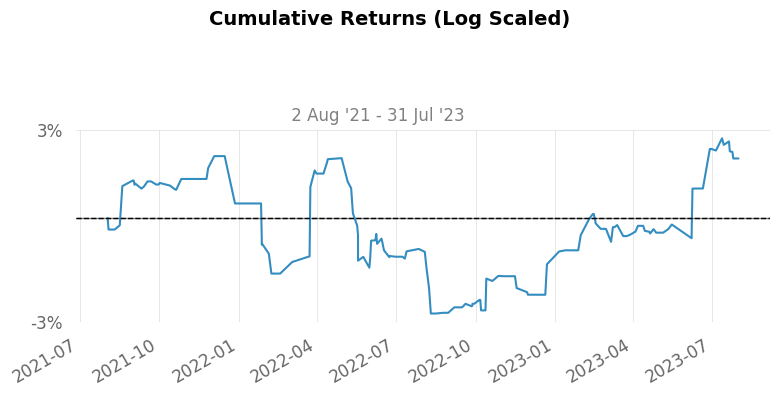

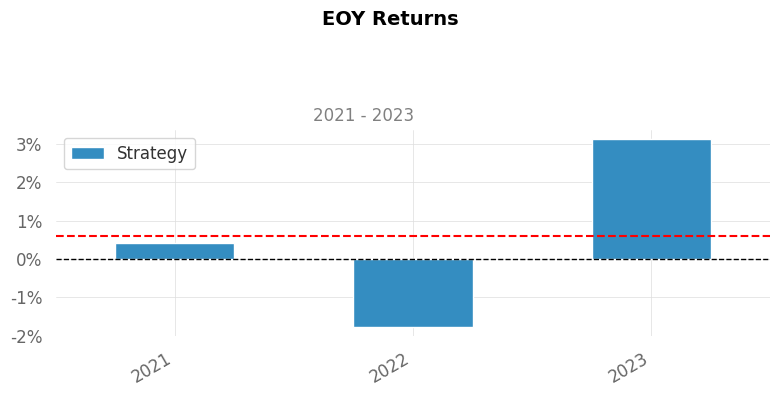

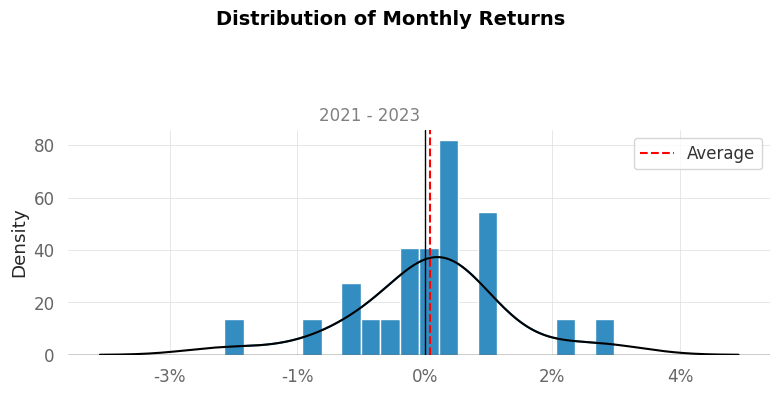

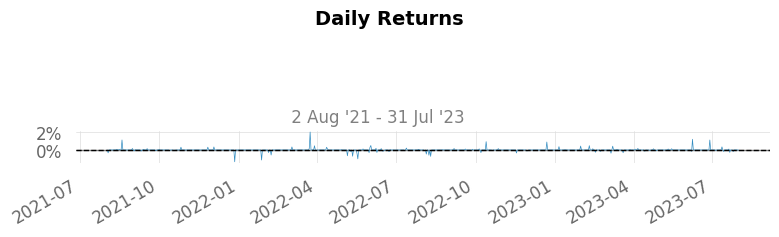

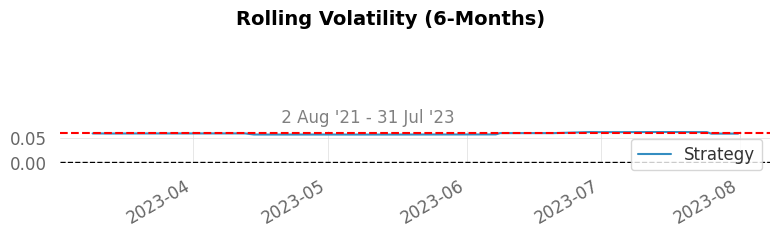

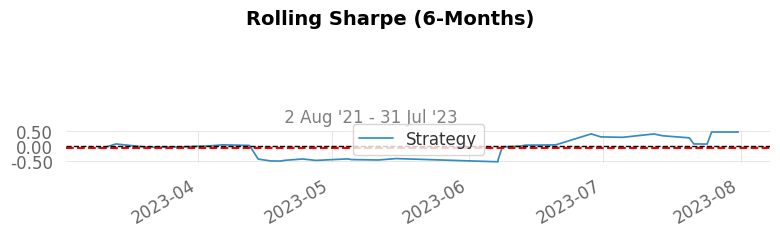

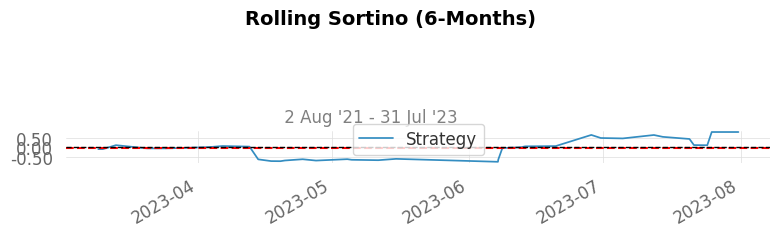

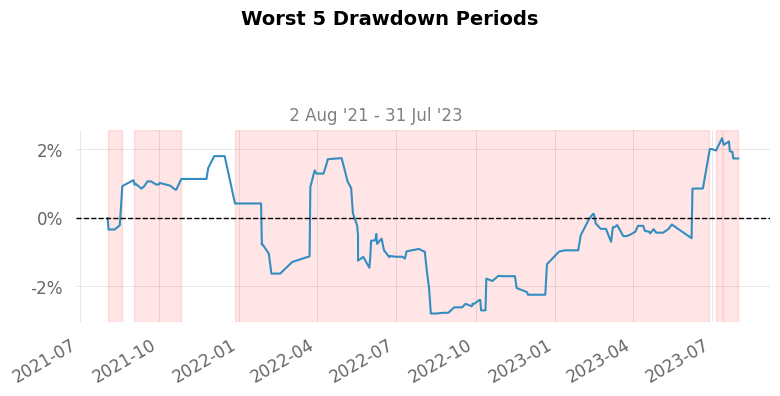

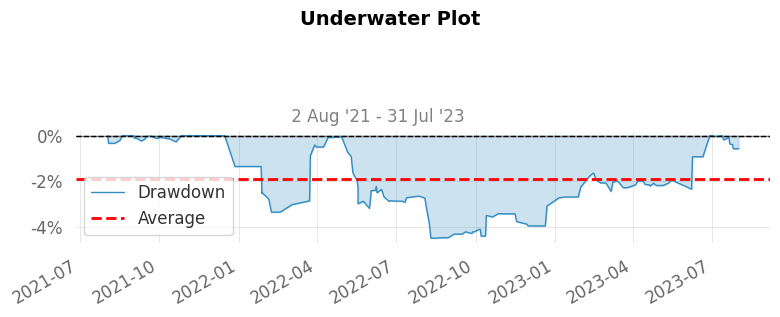

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


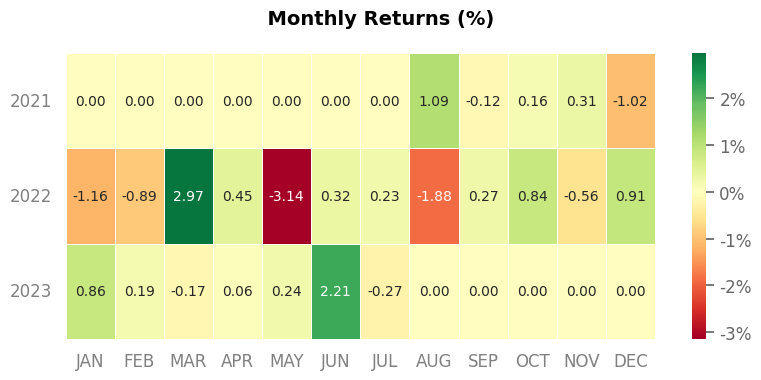

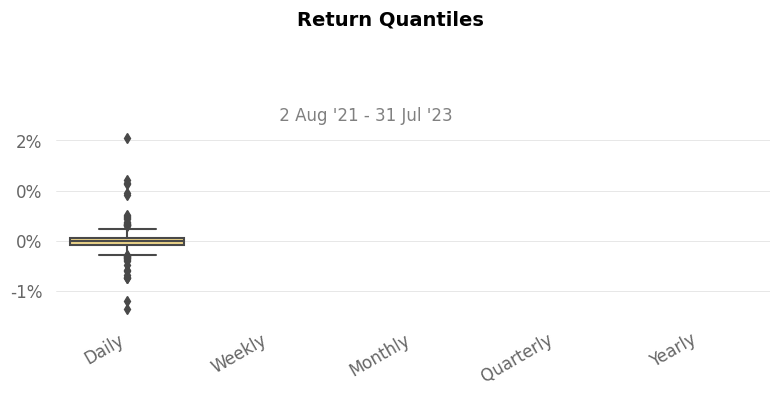

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [20]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True, initial_funds=initial_virtual_funds)

## Order History

In [21]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+----------------+---------------------------+----------------------------------+------+
| INST           | TIME                      | ID                               | TT   |
|----------------+---------------------------+----------------------------------+------|
| NASDAQ_EQ:NVDA | 2021-08-02 10:30:00-04:00 | d1cd342a570d466d982d9baff075b4f7 | SELL |
+----------------+---------------------------+----------------------------------+------+
+----+----------------------------------+------------------------+-------+
|    | TIME                             | STATE                  | MSG   |
|----+----------------------------------+------------------------+-------|
|  0 | 2021-08-02 10:30:00.500000-04:00 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-02 10:30:00.500000-04:00 | VALIDATION PENDING     |       |
|  2 | 2021-08-02 10:30:00.500000-04:00 | OPEN PENDING           |       |
|  3 | 2021-08-02 10:30:00.500000-04:00 | OPEN                   |       |
|  4 | 2021-08-02 10:30:00.5

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

### Start

In [22]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)


Starting the strategy 'Bollinger Bands US' in REALTRADING mode...
╒═════════════════╤═══════════════════════════════════════════════╕
│ Config          │ Value                                         │
╞═════════════════╪═══════════════════════════════════════════════╡
│ Vendor Name     │ ALPACAV2                                      │
├─────────────────┼───────────────────────────────────────────────┤
│ Broker Name     │ ALPACAV2                                      │
├─────────────────┼───────────────────────────────────────────────┤
│ Strategy Name   │ Bollinger Bands US                            │
├─────────────────┼───────────────────────────────────────────────┤
│ Trading Type    │ REALTRADING                                   │
├─────────────────┼───────────────────────────────────────────────┤
│ Instrument(s)   │ ['NASDAQ:NVDA']                               │
├─────────────────┼───────────────────────────────────────────────┤
│ Quantity/Lots   │ 5                            

### Status

In [22]:
connection.get_realtrading_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [23]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

[2023-08-22 20:17:07] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 20:17:07] Sanity checks on cfg successful.
[2023-08-22 20:17:07] Currency set to "USD"
[2023-08-22 20:17:07] Setting up broker connection...
[2023-08-22 20:17:09] Broker connection has been setup successfully.
[2023-08-22 20:17:09] (NASDAQ_EQ) Funds available in client's ALPACAV2 account is : USD '3839600.76'
[2023-08-22 20:17:09] [QUERYING] Sanity check: Ensuring all instruments are affordable...
[2023-08-22 20:17:10] [PASSED] Sanity check: All instruments are affordable
[2023-08-22 20:17:10] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 20:17:10] Welcome PA327K1V17PK!
[2023-08-22 20:17:10] Reading strategy...
[2023-08-22 20:17:12] Entering Realtrading mode. Henceforth, all timestamps will be Realtrading timestamps...
[2023-08-22 10:47:12,098] [INFO] [tls] STARTING ALGOBU

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)